In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [52]:
dataset = pd.read_csv('Downloads\\bank-full.csv', sep=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
dataset.shape

(45211, 17)

In [54]:
dataset.size

768587

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
dataset.describe().astype(np.int64)

,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


In [57]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

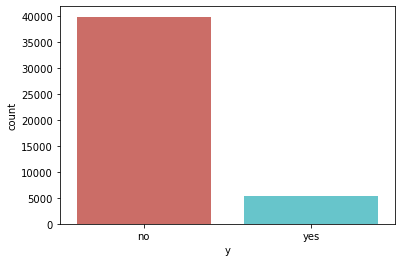

In [58]:
sns.countplot(x='y',data=dataset, palette='hls')
plt.show()

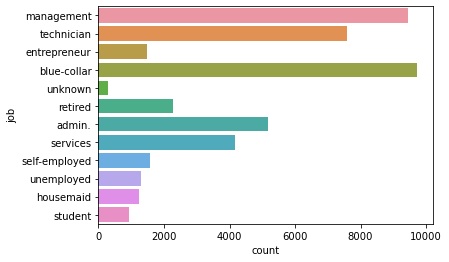

In [59]:
sns.countplot(y="job", data=dataset)
plt.show()

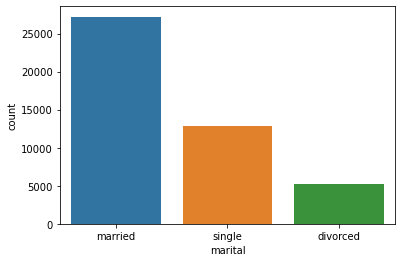

In [60]:
sns.countplot(x="marital", data=dataset)
plt.show()

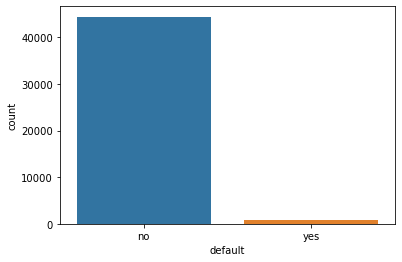

In [61]:
sns.countplot(x="default", data=dataset)
plt.show()

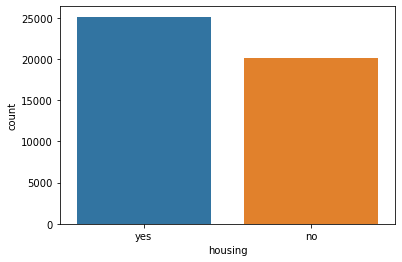

In [62]:
sns.countplot(x="housing", data=dataset)
plt.show()

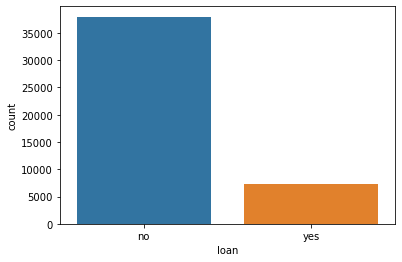

In [63]:
sns.countplot(x="loan", data=dataset)
plt.show()

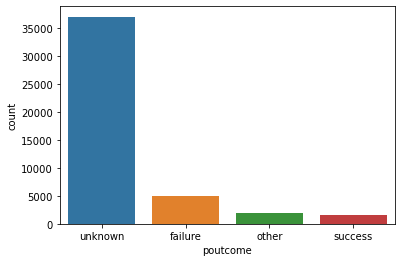

In [64]:
sns.countplot(x="poutcome", data=dataset)
plt.show()

In [65]:
dataset.drop(dataset.columns[[0, 3, 5, 8, 9, 10, 11, 12, 13, 14]], axis=1, inplace=True)

In [66]:
data2 = pd.get_dummies(dataset, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [67]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,no,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,no,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [68]:
data2.drop(data2.columns[[12, 16, 18, 21]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_no', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

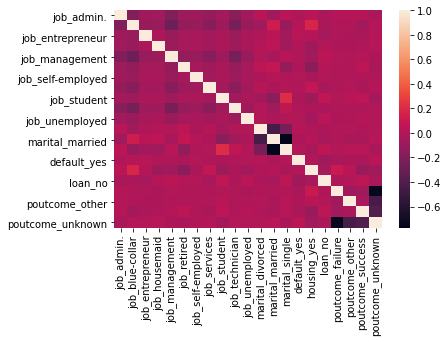

In [69]:
sns.heatmap(data2.corr())
plt.show()

In [70]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
X_train.shape

(33908, 21)

In [72]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
y_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9852  126]
 [1107  218]]


In [75]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89
